In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv("Country-data.csv")

In [46]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [47]:
data.shape

(167, 10)

In [48]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [50]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scaled_data = scalar.fit_transform(data.iloc[:,1:])
scaled_data = pd.DataFrame(scaled_data, columns = data.iloc[:,1:].columns)
scaled_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
data1= data.drop(['country'],axis=1)
cols= data1.columns
from sklearn.preprocessing import StandardScaler
st_scale= StandardScaler()
scaled_data=st_scale.fit_transform(data1)

In [70]:
from sklearn.decomposition import PCA
pca = PCA(0.8)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(167, 4)

In [71]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.4595174  0.17181626 0.13004259 0.11053162]
0.8719078614023908


In [72]:
from sklearn.cluster import KMeans

In [73]:
wcss=[]
import warnings
warnings.filterwarnings('ignore')
print("n_clusters\t\tInertia")
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmean.fit(x_pca)
    wcss.append(kmean.inertia_)
    print(i,"\t\t",kmean.inertia_)
    

n_clusters		Inertia
1 		 1310.477515687794
2 		 859.0954098354579
3 		 643.3530304947258
4 		 514.2073501405231
5 		 446.45906170164875
6 		 396.6556743592218
7 		 361.702943716346
8 		 318.5810766146195
9 		 291.62911144194936
10 		 269.65232287055784


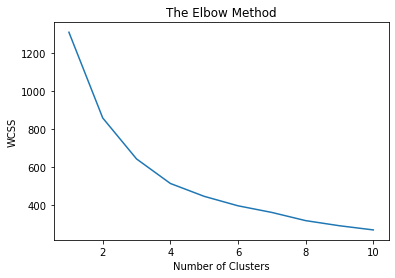

In [74]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [75]:
kmean=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_kmean=kmean.fit_predict(x_pca)

In [76]:
y_kmean

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 3, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

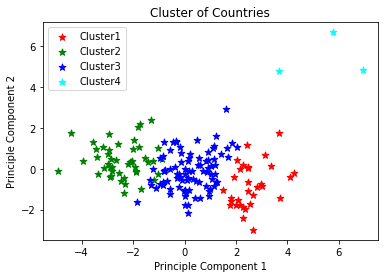

In [77]:
plt.scatter(x_pca[y_kmean==0,0],x_pca[y_kmean==0,1],s=50,marker="*",color="red",label="Cluster1")
plt.scatter(x_pca[y_kmean==1,0],x_pca[y_kmean==1,1],s=50,marker="*",color="green",label="Cluster2")
plt.scatter(x_pca[y_kmean==2,0],x_pca[y_kmean==2,1],s=50,marker="*",color="blue",label="Cluster3")
plt.scatter(x_pca[y_kmean==3,0],x_pca[y_kmean==3,1],s=50,marker="*",color="cyan",label="Cluster4")
plt.title("Cluster of Countries")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend(loc="best")
plt.show()

#### Agglomerative Clustering

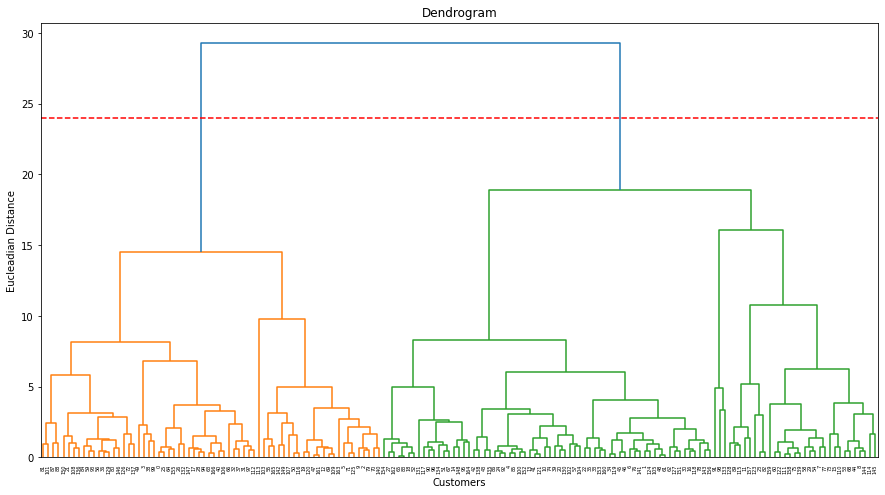

In [79]:
plt.figure(figsize=(15,8))
from scipy.cluster import hierarchy as sch
dend=sch.dendrogram(sch.linkage(x_pca,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucleadian Distance")
plt.hlines(24,0,27000,colors="red",linestyles="dashed")
plt.show()

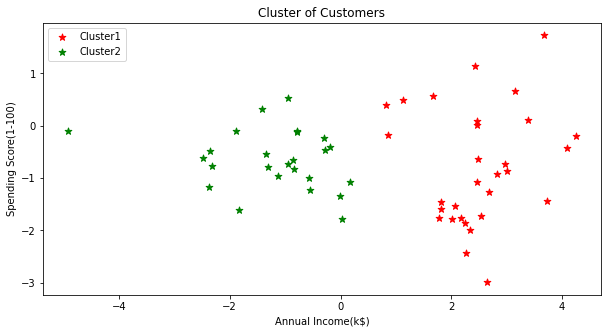

In [80]:
from sklearn.cluster import AgglomerativeClustering as ac
ac1=ac(n_clusters=5,affinity="euclidean",linkage='ward')
y_ac=ac1.fit_predict(x_pca)
plt.figure(figsize=(10,5))
plt.scatter(x_pca[y_ac==0,0],x_pca[y_ac==0,1],s=50,marker="*",color="red",label="Cluster1")
plt.scatter(x_pca[y_ac==1,0],x_pca[y_ac==1,1],s=50,marker="*",color="green",label="Cluster2")
plt.title("Cluster of Customers")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score(1-100)")
plt.legend(loc="best")
plt.show()


In [84]:
data['cluster_no']=kmean.labels_

In [85]:
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2


In [86]:
data_new =  data.groupby(['cluster_no']).mean()

In [87]:
data_new.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_no,,,,,,,,,
0,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.598837,41.003360,6.216744,47.865883,12790.348837,7.516291,72.882558,2.295581,6769.325581
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [90]:
cluster0=data[data['cluster_no']==0]
cluster0.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100,0
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500,0
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,0
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,0
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600,0
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
111,New Zealand,6.2,30.3,10.10,28.0,32300,3.730,80.9,2.17,33700,0
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000,0
